In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
warnings.filterwarnings("ignore")

%matplotlib inline

# Data Cleaning Task for Algerian fire dataset

In [5]:
data=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [6]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [7]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [8]:
data.rename(columns={' RH':'humidity',' Ws':'wind speed','Classes  ':'Classes'} ,inplace=True)

In [9]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'humidity', 'wind speed',
       'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [10]:
data.isnull().sum()

day            0
month          1
year           1
Temperature    1
humidity       1
wind speed     1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [11]:
data=data.dropna()

In [12]:
df_num=data.iloc[:,:-1]

In [13]:
df_cat=data.iloc[:,-1]

In [14]:
df_num

,day,month,year,Temperature,humidity,wind speed,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [15]:
df_cat

0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
241         fire   
242     not fire   
243     not fire   
244     not fire   
245    not fire    
Name: Classes, Length: 244, dtype: object

In [16]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   humidity     244 non-null    object
 5   wind speed   244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
dtypes: object(13)
memory usage: 26.7+ KB


In [17]:
df_num['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', 'day'],
      dtype=object)

In [18]:
df_num[df_num['day']=='day']

,day,month,year,Temperature,humidity,wind speed,Rain,FFMC,DMC,DC,ISI,BUI,FWI
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI


In [19]:
df_num.shape

(244, 13)

In [23]:
df_num=df_num.drop(df_num.index[123])

In [24]:
df_num.shape

(242, 13)

In [25]:
df_num['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [26]:
df_num['day']=df_num['day'].astype('int')

In [27]:
df_num['day'].info()

<class 'pandas.core.series.Series'>
Int64Index: 242 entries, 0 to 245
Series name: day
Non-Null Count  Dtype
--------------  -----
242 non-null    int32
dtypes: int32(1)
memory usage: 2.8 KB


In [28]:
df_num.head()

,day,month,year,Temperature,humidity,wind speed,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4
2,3,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0
4,5,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5


In [29]:
df_num.rename(columns={' RH':'humidity','Rain ':'Rain'} ,inplace=True)

In [30]:
df_num['month'].unique()

array(['06', '07', '08', '09'], dtype=object)

In [31]:
df_num['month']=df_num['month'].astype('int')

In [32]:
df_num['year'].unique()

array(['2012'], dtype=object)

In [33]:
df_num['year']=df_num['year'].astype('int')

In [34]:
df_num['Temperature'].unique()

array(['29', '26', '25', '27', '31', '33', '30', '28', '32', '34', '35',
       '36', '37', '22', '24', '38', '39', '40', '42'], dtype=object)

In [35]:
df_num['Temperature']=df_num['Temperature'].astype('int')

In [36]:
df_num['humidity'].unique()

array(['57', '61', '82', '89', '77', '67', '54', '73', '88', '79', '65',
       '81', '84', '78', '80', '55', '62', '66', '64', '53', '47', '50',
       '68', '75', '76', '63', '69', '70', '59', '48', '45', '60', '51',
       '52', '58', '86', '74', '71', '49', '44', '41', '42', '90', '87',
       '72', '46', '37', '36', '56', '43', '83', '29', '34', '33', '35',
       '39', '31', '21', '40', '24', '38', '26'], dtype=object)

In [37]:
df_num['humidity']=df_num['humidity'].astype('int')

In [38]:
df_num['wind speed'].unique()

array(['18', '13', '22', '16', '14', '15', '12', '19', '21', '20', '17',
       '26', '11', '10', '9', '8', '6', '29'], dtype=object)

In [39]:
df_num['wind speed']=df_num['wind speed'].astype('int')

In [40]:
df_num['Rain'].unique()

array(['0', '1.3', '13.1', '2.5', '0.2', '1.2', '0.5', '3.1', '0.7',
       '0.6', '0.3', '0.1', '0.4', '1', '1.4', '0.8', '16.8', '7.2',
       '10.1', '3.8', '0.9', '1.8', '4.6', '8.3', '5.8', '2', '4.7',
       '8.7', '4.5', '1.1', '1.7', '2.2', '6', '1.9', '2.9', '4.1', '6.5',
       '4.4'], dtype=object)

In [41]:
df_num['Rain']=df_num['Rain'].astype('float')

In [42]:
df_num['FFMC']=df_num['FFMC'].astype('float')

In [43]:
df_num['DMC']=df_num['DMC'].astype('float')

In [44]:
df_num['DC']=df_num['DC'].astype('float')

In [45]:
df_num['ISI']=df_num['ISI'].astype('float')

In [46]:
df_num['ISI'].info()

<class 'pandas.core.series.Series'>
Int64Index: 242 entries, 0 to 245
Series name: ISI
Non-Null Count  Dtype  
--------------  -----  
242 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


In [47]:
df_num['BUI']=df_num['BUI'].astype('float')

In [48]:
df_num['FWI']=df_num['FWI'].astype('float')

In [49]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 245
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int32  
 1   month        242 non-null    int32  
 2   year         242 non-null    int32  
 3   Temperature  242 non-null    int32  
 4   humidity     242 non-null    int32  
 5   wind speed   242 non-null    int32  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
dtypes: float64(7), int32(6)
memory usage: 20.8 KB


In [50]:
df_num.describe()

,day,month,year,Temperature,humidity,wind speed,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,242.000000,242.000000,242.0,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,15.818182,7.508264,2012.0,32.161157,61.995868,15.504132,0.749587,77.933884,14.730165,49.602893,4.759504,16.747521,7.063636
std,8.816243,1.112888,0.0,3.632903,14.842045,2.812609,1.996454,14.308173,12.394623,47.688744,4.154248,14.230095,7.442923
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.250000,14.000000,0.000000,72.375000,5.800000,14.325000,1.400000,6.025000,0.725000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.250000,3.500000,12.450000,4.450000
75%,23.000000,8.000000,2012.0,35.000000,73.750000,17.000000,0.500000,88.300000,20.850000,70.050000,7.275000,22.775000,11.525000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [51]:
df_num[df_num.duplicated()]

,day,month,year,Temperature,humidity,wind speed,Rain,FFMC,DMC,DC,ISI,BUI,FWI


In [52]:
#KDE plot 

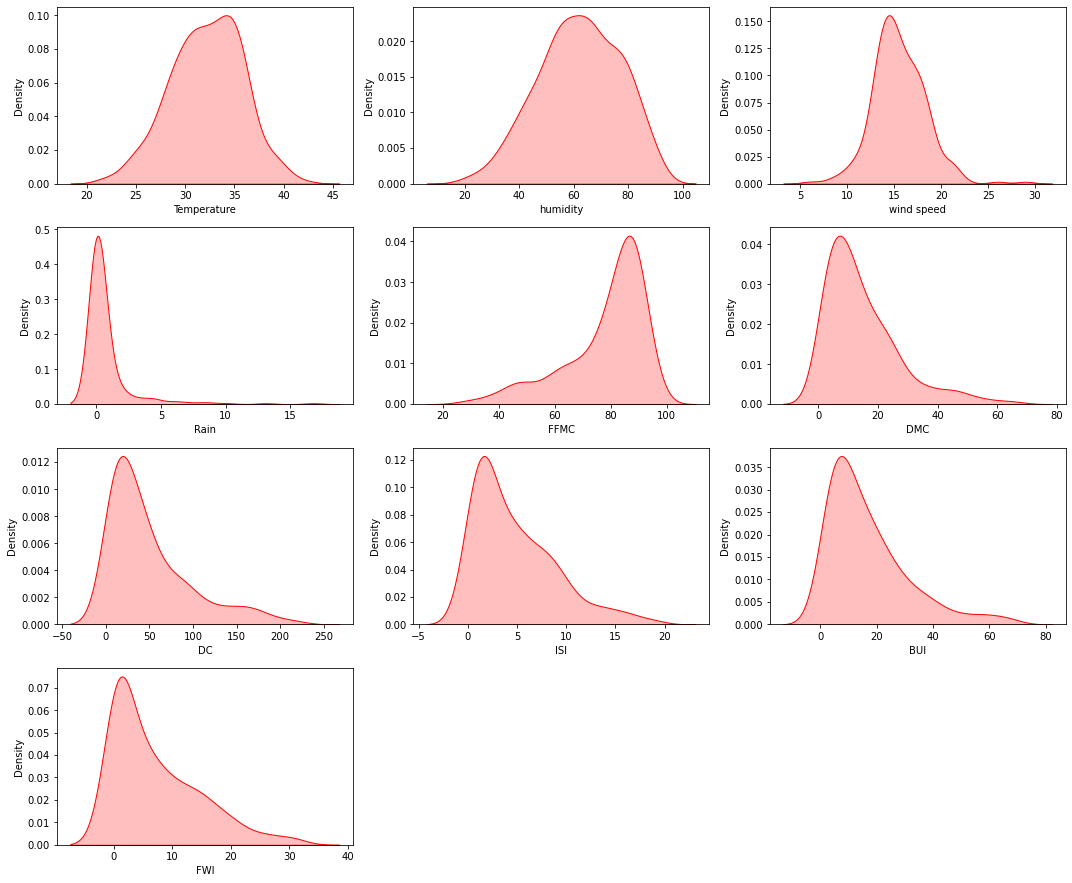

In [53]:
plt.figure(figsize=(15,15))
columns=df_num.columns[3:]
for i in range(0,len(columns)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_num[columns[i]],shade=True,color='r')
    plt.xlabel=columns[i]
    plt.tight_layout()

In [54]:
df_num

,day,month,year,Temperature,humidity,wind speed,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [55]:
df_num['Temperature'].value_counts()

35    29
31    25
34    24
33    23
32    21
36    21
30    21
29    18
28    15
27     8
37     8
25     6
39     6
26     5
24     3
38     3
40     3
22     2
42     1
Name: Temperature, dtype: int64

<AxesSubplot:xlabel='Temperature', ylabel='count'>

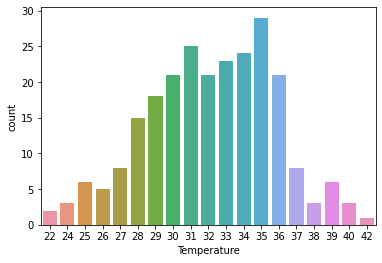

In [56]:
sns.countplot(df_num['Temperature'])

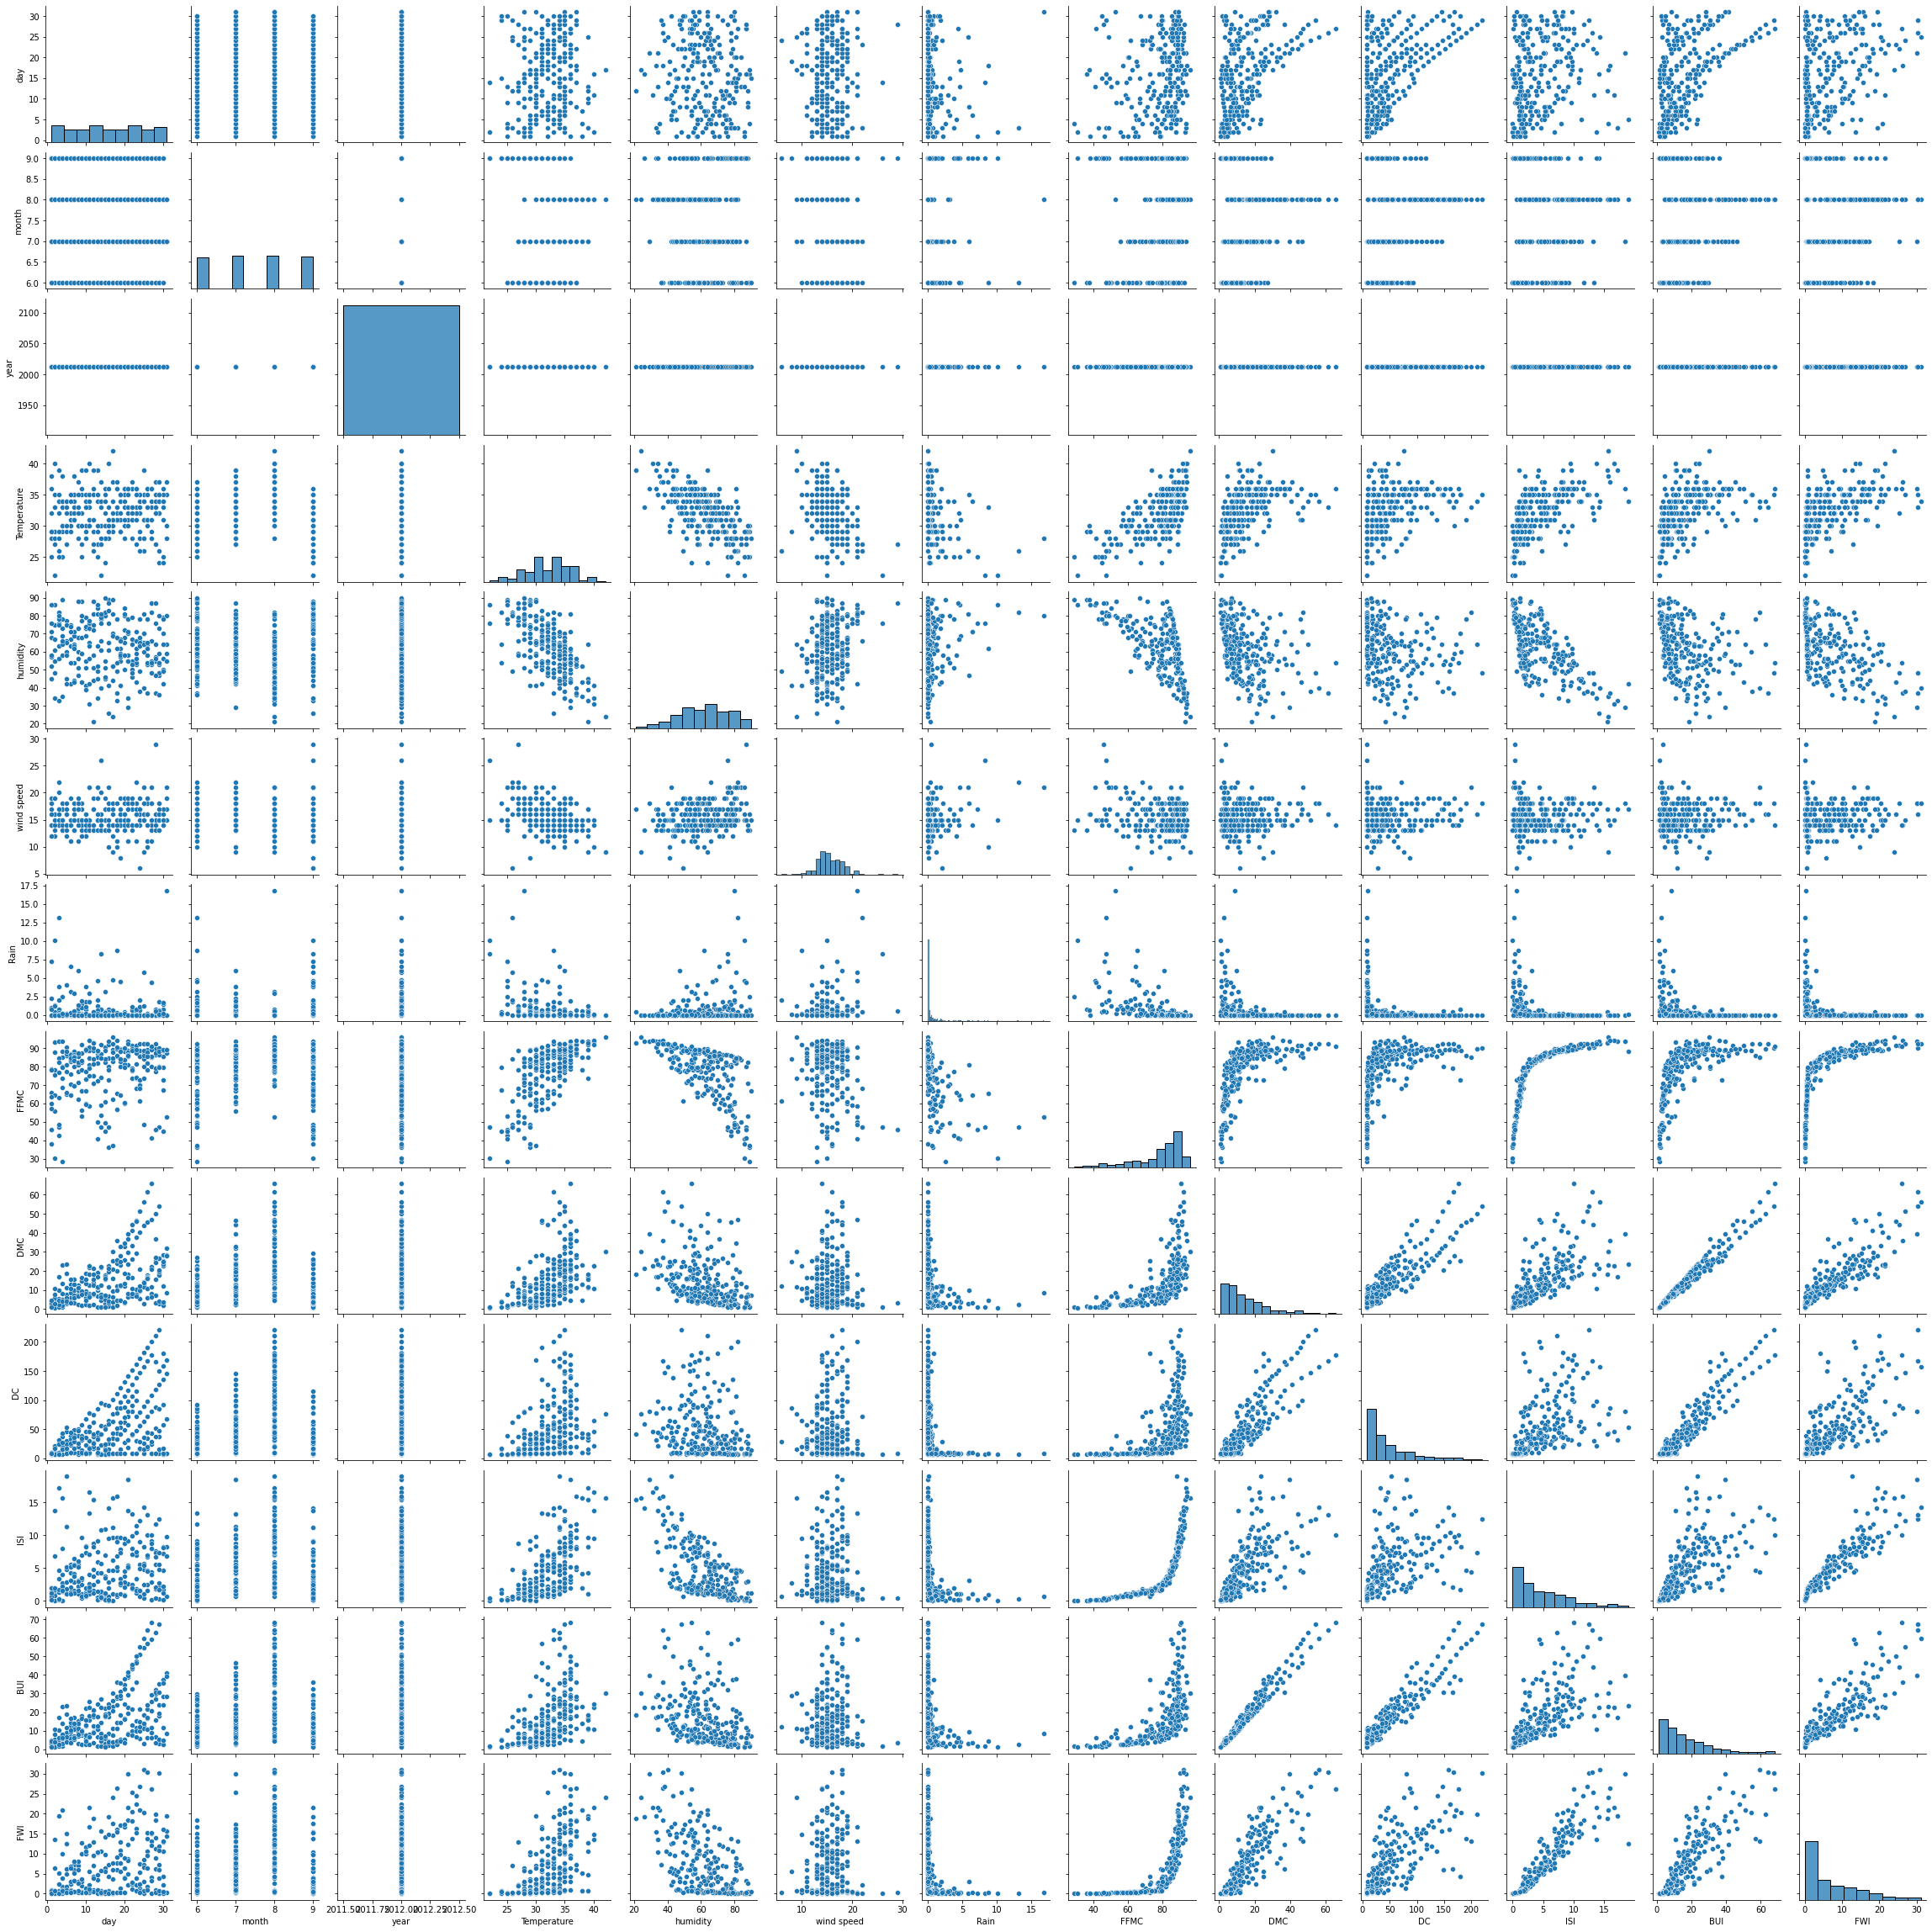

In [57]:
sns.pairplot(df_num)

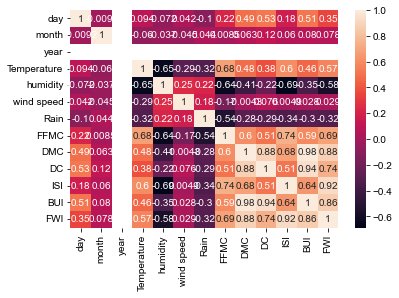

In [58]:
sns.heatmap(df_num.corr(),annot=True)
sns.set(rc={'figure.figsize':(10,10)})

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Temperature', ylabel='FFMC'>

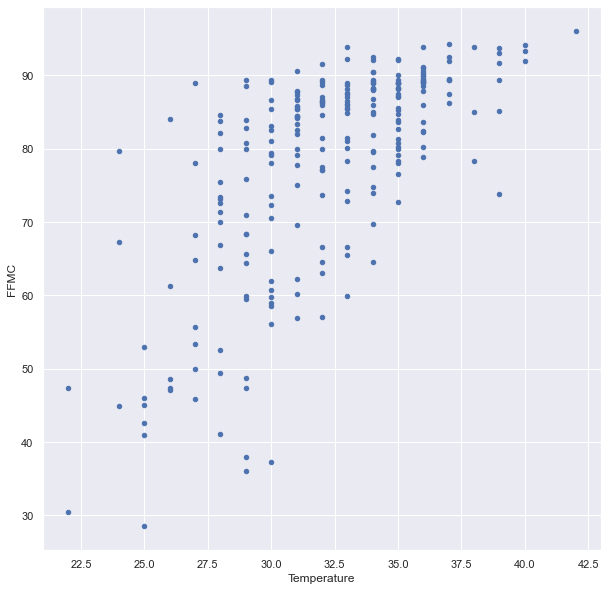

In [59]:
df_num.plot.scatter(x='Temperature',y='FFMC')

<AxesSubplot:xlabel='Temperature', ylabel='FFMC'>

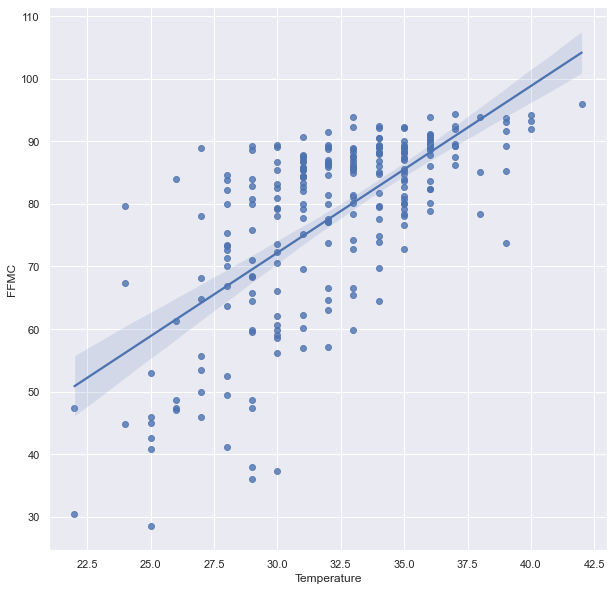

In [60]:
sns.regplot(x=df_num.Temperature,y=df_num.FFMC)

# linear Regression Task

In [63]:
df_num.head(1)

,day,month,year,Temperature,humidity,wind speed,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5


In [98]:
## X is indipendent feature
##Y is dependent feature
X=df_num.loc[0:,[i for i in df_num.columns[3:] if i !='Temperature']]
y=df_num.loc[0:,['Temperature']]

In [76]:
X

,humidity,wind speed,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...
241,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
242,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
243,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
244,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


# Training Model

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=10)

In [80]:
## Standardize or feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [81]:
X_train=scaler.fit_transform(X_train)

In [82]:
X_test=scaler.transform(X_test)

In [92]:
X_train.shape

(162, 9)

In [93]:
y_train.shape

(162, 1)

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
regression=LinearRegression()

In [87]:
regression.fit(X_train,y_train)

LinearRegression()

In [88]:
## print the coefficients and the intercept
print(regression.coef_)

[[-1.24977404 -0.85329601 -0.15729836  1.00461607  0.24304768  0.19417099
   0.4096827   0.24398487 -0.54558296]]


In [89]:
print(regression.intercept_)

[32.08024691]


In [94]:
## PRediction for the test data
reg_pred_temp=regression.predict(X_test)

In [97]:
reg_pred_temp

array([[34.56917811],
       [31.89827494],
       [33.86103871],
       [36.27331306],
       [27.88230457],
       [32.72996168],
       [36.43775705],
       [32.41366881],
       [33.06061366],
       [34.3155769 ],
       [25.96701487],
       [27.853773  ],
       [33.34670614],
       [36.5634164 ],
       [32.39358995],
       [32.3853089 ],
       [32.26949802],
       [34.40545946],
       [35.14465051],
       [35.23065441],
       [36.10194816],
       [35.63956356],
       [33.32849797],
       [33.04476486],
       [33.21711146],
       [32.8506836 ],
       [28.46304502],
       [32.20043423],
       [35.57701267],
       [33.90418563],
       [33.83662152],
       [32.97286033],
       [34.268854  ],
       [28.99202168],
       [27.37125165],
       [34.93932774],
       [31.97347737],
       [33.04802197],
       [34.16688493],
       [30.16375435],
       [32.81074085],
       [32.7381894 ],
       [31.58371362],
       [30.93259841],
       [32.14796736],
       [33

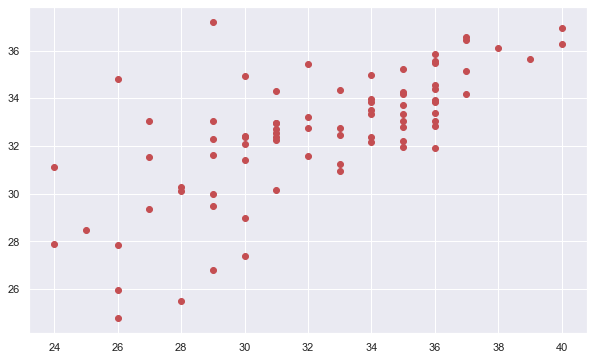

In [110]:
plt.figure(figsize=[10,6])
plt.scatter(y_test,reg_pred_temp,c='r',alpha=1)

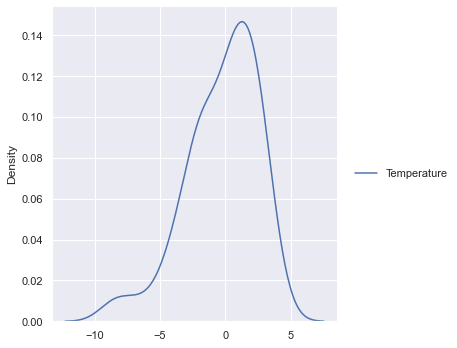

In [118]:
#residuals
res=y_test-reg_pred_temp
sns.displot(res,kind='kde')

In [119]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred_temp))
print(mean_absolute_error(y_test,reg_pred_temp))
print(np.sqrt(mean_squared_error(y_test,reg_pred_temp)))

7.484510418004584
2.1528374339323855
2.735783328044197


# R square and adjusted R square

In [120]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred_temp)
print(score)

0.4809407191362606


In [121]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.41420452588235124

# Ridge Regression

In [122]:

from sklearn.linear_model import Ridge
ridge=Ridge()

In [123]:
ridge.fit(X_train,y_train)

Ridge()

In [125]:
ridge_pred_temp=ridge.predict(X_test)

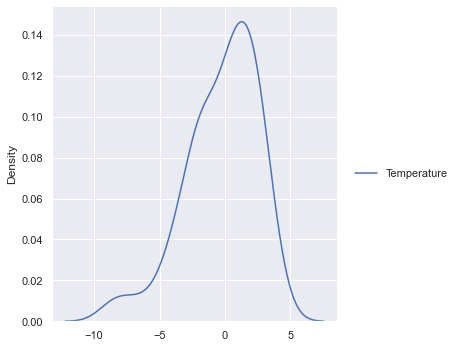

In [131]:
#residuals
res=y_test-ridge_pred_temp
sns.displot(res,kind='kde')

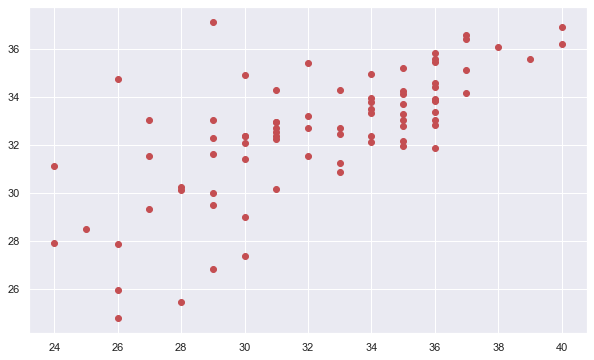

In [126]:
plt.figure(figsize=[10,6])
plt.scatter(y_test,ridge_pred_temp,c='r',alpha=1)

In [127]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,ridge_pred_temp))
print(mean_absolute_error(y_test,ridge_pred_temp))
print(np.sqrt(mean_squared_error(y_test,ridge_pred_temp)))

7.474985132795648
2.1532040544836244
2.7340419039940933


In [128]:
from sklearn.metrics import r2_score
score=r2_score(y_test,ridge_pred_temp)
print(score)

0.4816013084620071


In [129]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.414950048121408

# Lasso Regression

In [132]:

from sklearn.linear_model import Lasso
lasso=Ridge()

In [133]:
lasso.fit(X_train,y_train)

Ridge()

In [134]:
lasso_pred_temp=lasso.predict(X_test)

In [135]:
lasso_pred_temp

array([[34.59356928],
       [31.88332867],
       [33.84677348],
       [36.22759582],
       [27.91709354],
       [32.73179983],
       [36.44613387],
       [32.38194753],
       [33.0714682 ],
       [34.30409041],
       [25.9842626 ],
       [27.87794536],
       [33.29944255],
       [36.59116252],
       [32.36927466],
       [32.37819304],
       [32.25813141],
       [34.4218418 ],
       [35.14720442],
       [35.22039734],
       [36.09769132],
       [35.6088297 ],
       [33.34407161],
       [33.03640566],
       [33.21858479],
       [32.85666876],
       [28.48938657],
       [32.19755092],
       [35.60010763],
       [33.88276191],
       [33.79254454],
       [32.97649991],
       [34.27428426],
       [29.00743005],
       [27.39099781],
       [34.92774968],
       [31.97767537],
       [33.06303601],
       [34.17816821],
       [30.16868431],
       [32.81794689],
       [32.73773572],
       [31.56616891],
       [30.88040697],
       [32.13050135],
       [33

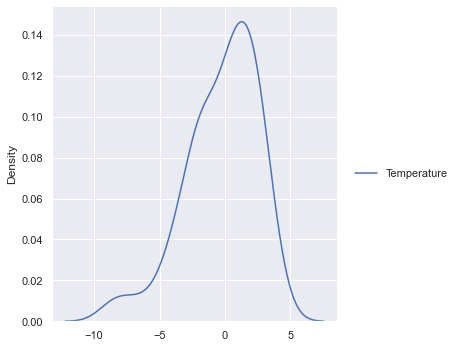

In [136]:
#residuals
res=y_test-lasso_pred_temp
sns.displot(res,kind='kde')

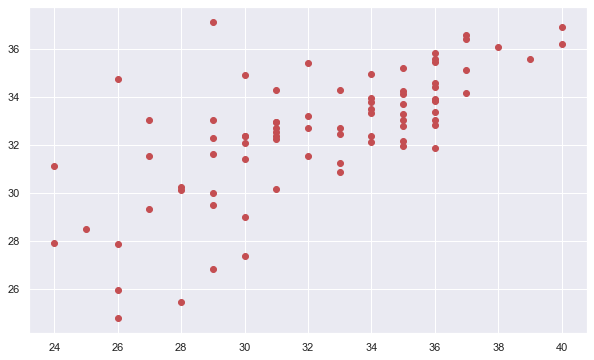

In [137]:
plt.figure(figsize=[10,6])
plt.scatter(y_test,lasso_pred_temp,c='r',alpha=1)

In [138]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lasso_pred_temp))
print(mean_absolute_error(y_test,lasso_pred_temp))
print(np.sqrt(mean_squared_error(y_test,lasso_pred_temp)))

7.474985132795648
2.1532040544836244
2.7340419039940933


In [139]:
from sklearn.metrics import r2_score
score=r2_score(y_test,lasso_pred_temp)
print(score)

0.4816013084620071


In [140]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.414950048121408